In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from numpy.random import seed

In [2]:
mu_pop = 50 #avg thickness 0.5mm assumed
std_pop = 10 #assumed

In [3]:
# seed(47)
# sample = abs(norm.rvs(size=10)) #10 rotis a day
# print(sample)

# sample_mean = np.mean(sample)
# print("Sample Mean : " + str(sample_mean))
# print("Sample SD : " + str(np.std(sample, ddof=1)))

In [65]:
seed(47)
samp_one = norm.rvs(loc=50, scale=10, size=50) #1 day sample

In [66]:
def daily_sample(n):
    return np.random.choice(samp_one, n)

In [54]:
seed(47)
daily_10 = daily_sample(10)

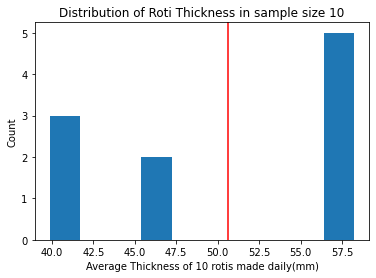

In [56]:
_ = plt.hist(daily_10, bins=10)
_ = plt.axvline(np.mean(daily_10), color='r')
_ = plt.xlabel('Average Thickness of 10 rotis made daily(mm)')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of Roti Thickness in sample size 10')

In [57]:
np.mean(daily_10)

50.636798689879235

In [58]:
ds_mean_d=[]

np.random.seed(47)
# take your samples here  
for _ in range(365):
    ds = daily_sample(10)
    ds_mean = np.mean(ds)
    ds_mean_d.append(ds_mean)
    
ds_mean_d = pd.DataFrame(ds_mean_d)

In [59]:
ds_mean = np.mean(ds_mean_d)
ds_mean

0    51.483346
dtype: float64

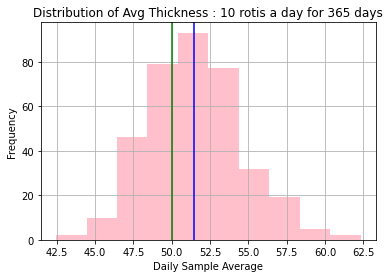

In [88]:
ds_mean_d.hist(color='pink')
_ = plt.axvline(50, color='g') # Population Mean
_ = plt.axvline(51.48, color='b') # Mean of daily samples (size10)
_ = plt.title('Distribution of Avg Thickness : 10 rotis a day for 365 days')
_ = plt.xlabel('Daily Sample Average')
_ = plt.ylabel('Frequency');

In [62]:
#What if I make 20 roti a day?

ds_mean_d_20=[]
seed(47)
# calculate daily means from the larger sample size here
for _ in range(365):
    ds_20 = daily_sample(20)
    ds_mean_20 = np.mean(ds_20)
    ds_mean_d_20.append(ds_mean_20)
    
ds_mean_d_20 = pd.DataFrame(ds_mean_d_20)
big_sample_mean = np.mean(ds_mean_d_20)
big_sample_mean

0    50.229687
dtype: float64

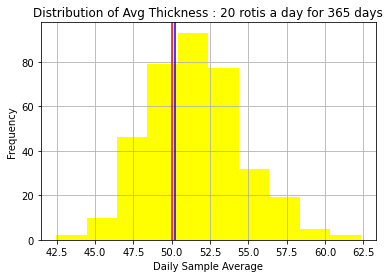

In [64]:
ds_mean_d.hist(color='yellow')
_ = plt.axvline(50, color='r') # Population Mean
_ = plt.axvline(50.2, color='b') # Mean of daily samples (size10)
_ = plt.title('Distribution of Avg Thickness : 20 rotis a day for 365 days')
_ = plt.xlabel('Daily Sample Average')
_ = plt.ylabel('Frequency');

In [67]:
# What if I make 50 rotis a day for a year? 

ds_mean_d_50=[]
seed(47)
# calculate daily means from the larger sample size here
for _ in range(365):
    ds_50 = daily_sample(50)
    ds_mean_50 = np.mean(ds_50)
    ds_mean_d_50.append(ds_mean_50)
    
ds_mean_d_50 = pd.DataFrame(ds_mean_d_50)
big_sample_mean_50 = np.mean(ds_mean_d_50)
big_sample_mean_50

0    48.148013
dtype: float64

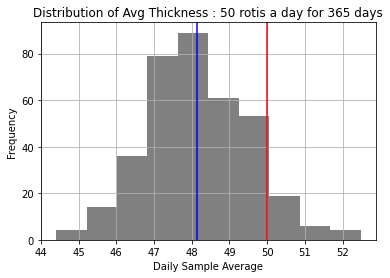

In [90]:
ds_mean_d_50.hist(color='gray')
_ = plt.axvline(50, color='r') # Population Mean
_ = plt.axvline(48.14, color='b') # Mean of daily samples (size10)
_ = plt.title('Distribution of Avg Thickness : 50 rotis a day for 365 days')
_ = plt.xlabel('Daily Sample Average')
_ = plt.ylabel('Frequency');

In [114]:
# H0 .... mu=50
# H1..... mu!=50

#Got reversed here because H0 should contain = sign, so to make a good roti I need to accept H0 (mu=50)


# n > 30
# std_pop known
# So z-test 

# alpha = 0.05

XAvg  = big_sample_mean_50
mu    = 50
sigma = 10 # (assumed again!)
n     = 365
Z = (XAvg - mu)/(sigma/np.sqrt(n))
print(Z)
# p_value = stats.norm.sf(abs(Z))
# print(p_value) 

0   -3.538215
dtype: float64


In [115]:
import statsmodels
from statsmodels.stats.weightstats import ztest
statsmodels.stats.weightstats.ztest(ds_mean_d_50) #Outputs t-value.. not correct! and doesn't match with t-test or Z calculated manually

(array([677.93021632]), array([0.]))

In [85]:
from scipy.stats             import ttest_1samp
ttest_1samp(ds_50, 50)

Ttest_1sampResult(statistic=-0.18371036927388154, pvalue=0.8549987985548748)

In [72]:
seed(47)
# take your sample now
sample2 = daily_sample(365)
sample2_Mean = np.mean(sample2)
sample2_SD = np.std(sample2, ddof=1)

In [73]:
print('Sample Mean : ' + str(sample2_Mean.round(2)))
print('Sample Standard Deviation : ' + str(sample2_SD.round(2)))

Sample Mean : 48.37
Sample Standard Deviation : 9.56


In [74]:
#Computing Margin of error (95% confidence)
margin_err = norm.ppf(0.975)*sample2_SD/np.sqrt(50) 
margin_err.round(4)

2.6485

In [75]:
# Confidence Interval Calculation
lc, uc = [sample2_Mean - margin_err , sample2_Mean + margin_err]
print('Upper Confidence Interval : ' + str(uc.round(4)))
print('Lower Confirdence Interval :' + str(lc.round(4)))

Upper Confidence Interval : 51.0164
Lower Confirdence Interval :45.7194


<IPython.core.display.Javascript object>

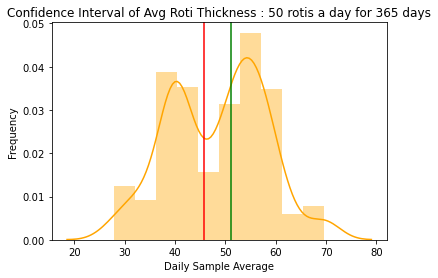

In [113]:
sns.distplot(sample2, color='orange')
_ = plt.axvline(uc, color='g') # upper Interval
_ = plt.axvline(lc, color='r') # Lower Interval
_ = plt.title('Confidence Interval of Avg Roti Thickness : 50 rotis a day for 365 days')
_ = plt.xlabel('Daily Sample Average')
_ = plt.ylabel('Frequency');